# Supervised Learning
Division train/test, training models, evaluation.

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('heart_selected_features.csv')
X = df.drop('target', axis=1)
y = df['target']


In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

results = []
roc_data = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)

    roc_data[name] = (fpr, tpr)
    results.append([name, acc, prec, rec, f1, auc_score])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"])
results_df


,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.852459,0.870968,0.84375,0.857143,0.937500
1,Decision Tree,0.803279,0.794118,0.84375,0.818182,0.801185
2,Random Forest,0.868852,0.928571,0.81250,0.866667,0.936961
3,SVM,0.868852,0.900000,0.84375,0.870968,0.942888


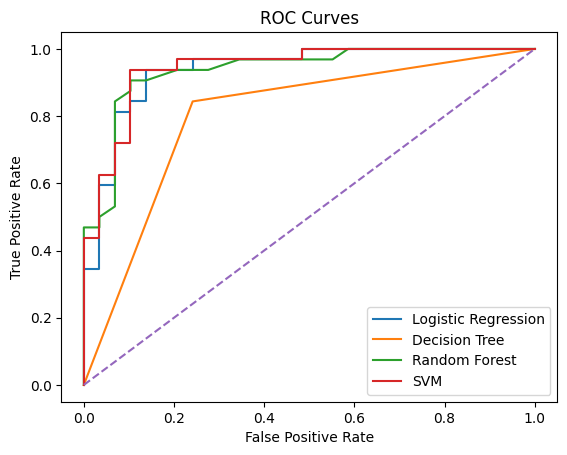

In [5]:

for name, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [6]:

results_df.to_csv('supervised_model_results.csv', index=False)
